In [1]:
import nbsetup
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from models.equations import velocity
from models.sparc.profile import generate_profiles
from models.sparc.galaxy import generate_galaxy
from models.sparc.result import Result
from models.space import Space
from models.galaxy import Galaxy

In [2]:
profiles = generate_profiles()

In [3]:
PROFILE = profiles['UGC02916']
GALAXY = generate_galaxy(PROFILE, 300, cp=nbsetup.cp)

completed in 5.14 seconds


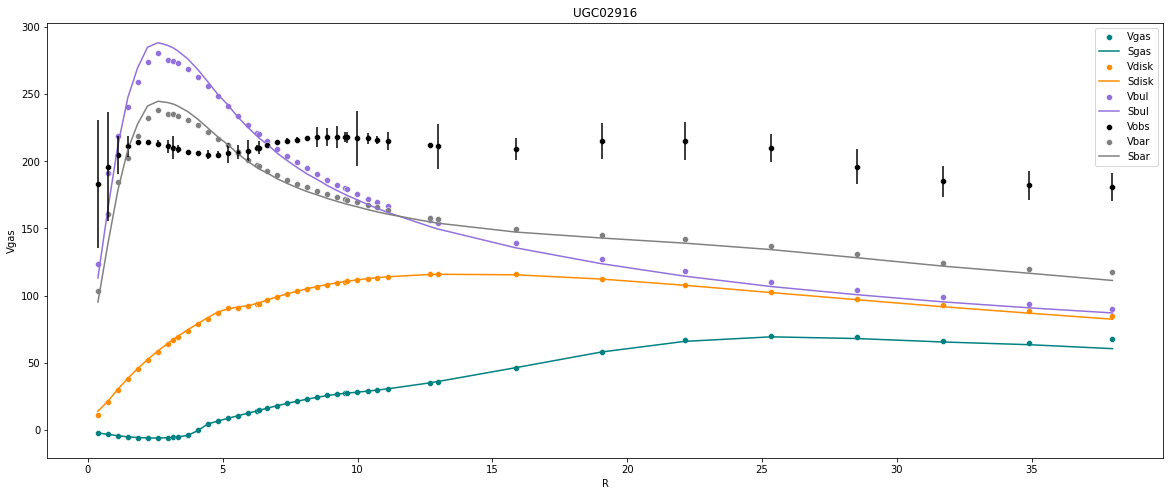

In [5]:
small = Result(simulations={'x':GALAXY})
small.plot_velocities()

completed in 10.18 seconds
{'disk': 0.285145811427741, 'bul': 0.1542929919812304}


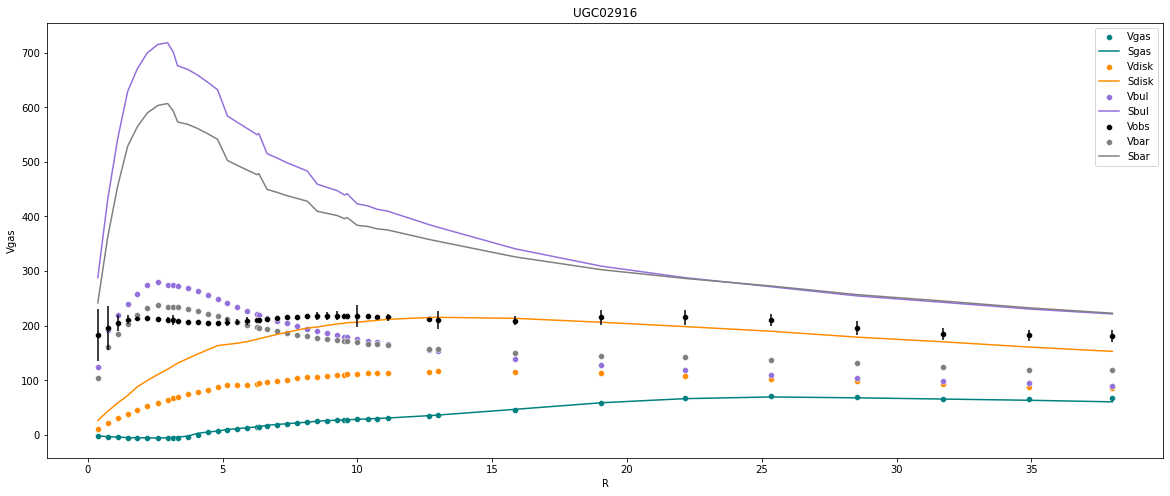

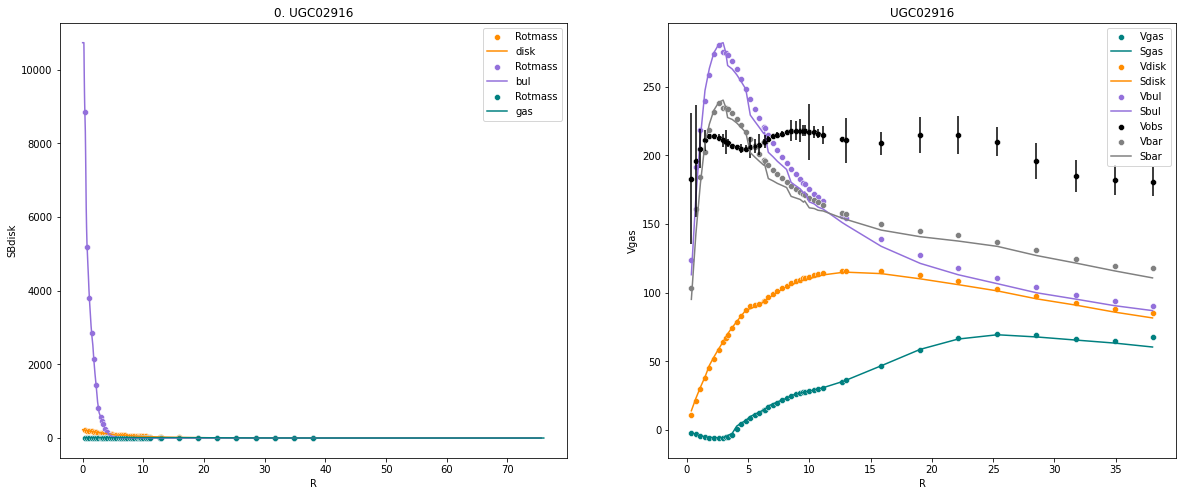

In [81]:
PROFILE = profiles['UGC02916']
GALAXY = gen_galaxy(PROFILE, 300, zcut=5, excess_ratio=1.2)
small = Result(simulations=GALAXY)
small.plot_velocities()
sims = GALAXY
for key, sim in sims.items():
    sims[key] = fit_simulation(sim.profile, sim)
    print(sims[key].fit_ratios)
small = Result(simulations=sims)
small.plot_velocities(profiles=True, sharex=False)

completed in 12.77 seconds


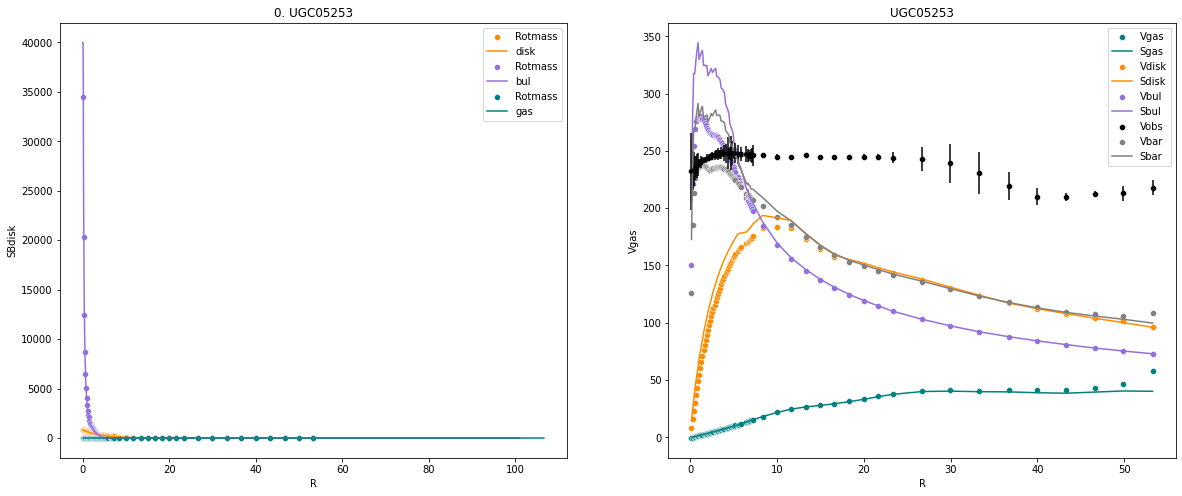

In [59]:
small = Result(simulations=gen_galaxies(2000, legacy=True, zcut=2, zh=0.0307907))
small.plot_velocities(profiles=True, sharex=False)

completed in 1.91 seconds


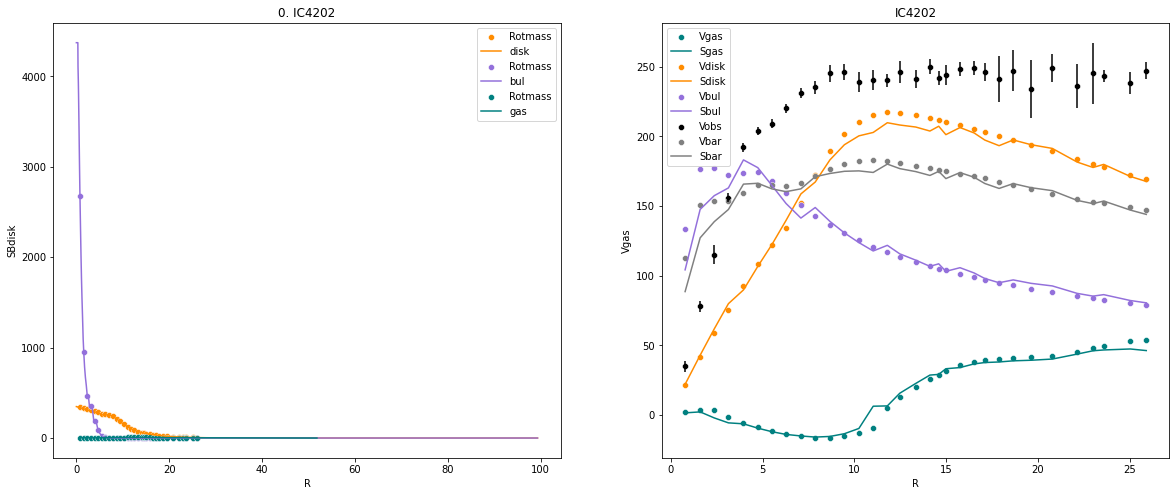

In [75]:
small = Result(simulations=gen_galaxy(profiles['IC4202'], 200, zcut=5, zh=1.60691185, sh=0.33448589))
small.plot_velocities(profiles=True, sharex=False)

completed in 4.69 seconds


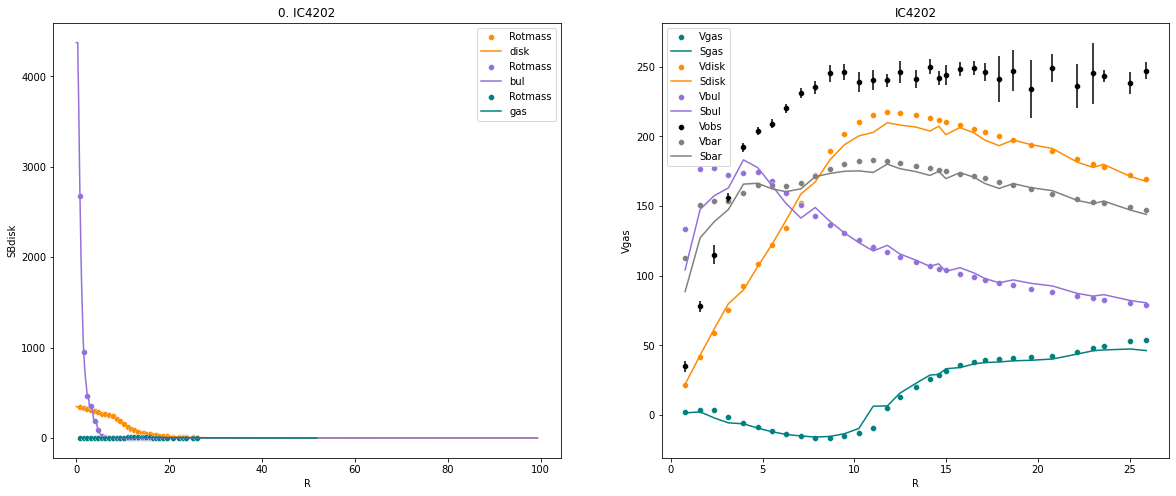

In [76]:
small = Result(simulations=gen_galaxy(profiles['IC4202'], 200, zcut=2, zh=1.60691185, sh=0.33448589))
small.plot_velocities(profiles=True, sharex=False)

completed in 47.59 seconds


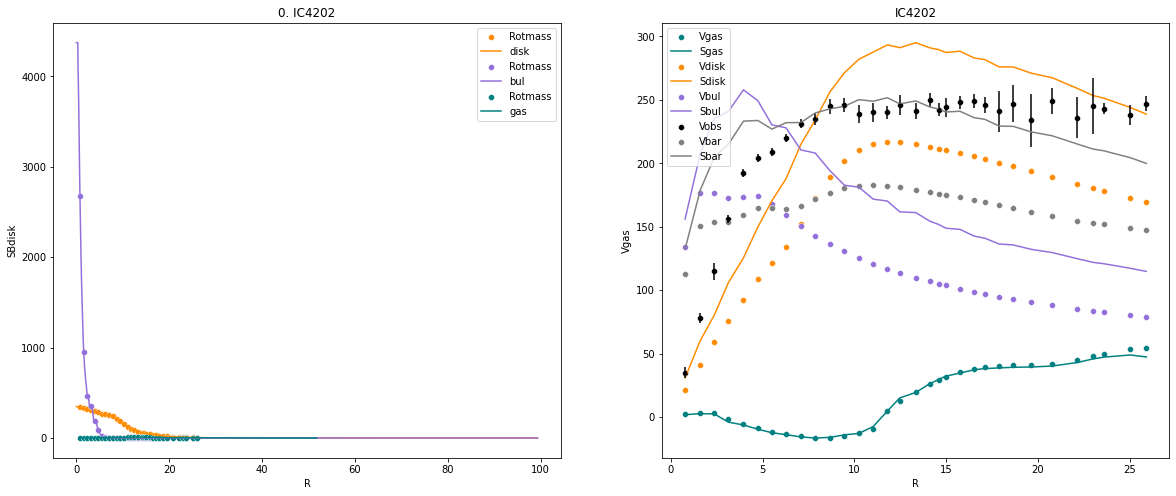

In [77]:
small = Result(simulations=gen_galaxy(profiles['IC4202'], 400, zcut=5, zh=1.60691185, sh=0.33448589))
small.plot_velocities(profiles=True, sharex=False)

completed in 0.11 seconds


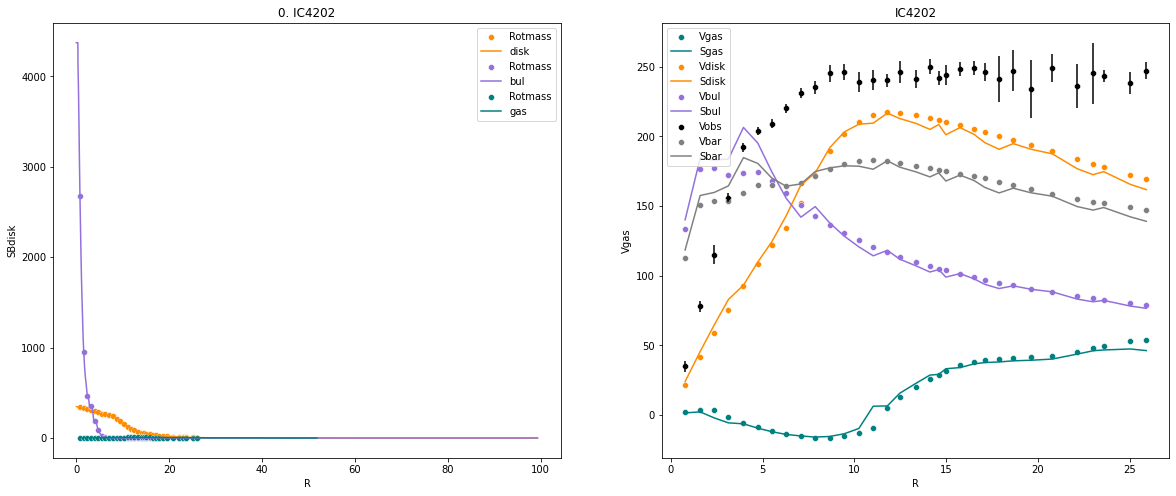

In [78]:
small = Result(simulations=gen_galaxy(profiles['IC4202'], 200, zcut=5, zh=1.60691185, sh=0.33448589, legacy=True))
small.plot_velocities(profiles=True, sharex=False)

In [ ]:
small = Result(simulations=gen_galaxies(200, zh=0.00048693))
small.plot_velocities(profiles=True, sharex=False)

completed in 0.06 seconds


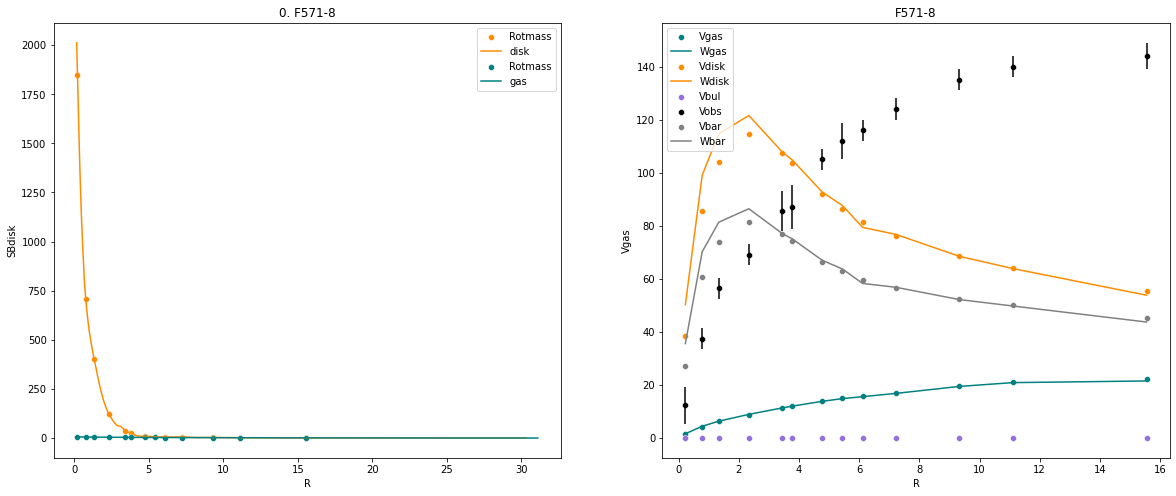

In [115]:
small = Result(simulations=gen_galaxies(200, legacy=True))
small.plot_velocities(profiles=True, sharex=False)

In [112]:
gen_galaxies()

completed in 1.38 seconds


{'CamB': <models.galaxy.Galaxy at 0x7f8bd4169ca0>}

In [176]:
masses_function(small.simulations['CamB'].profile, small.simulations['CamB'].space)[0][1][50].sum(axis=1)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

completed in 2.01 seconds


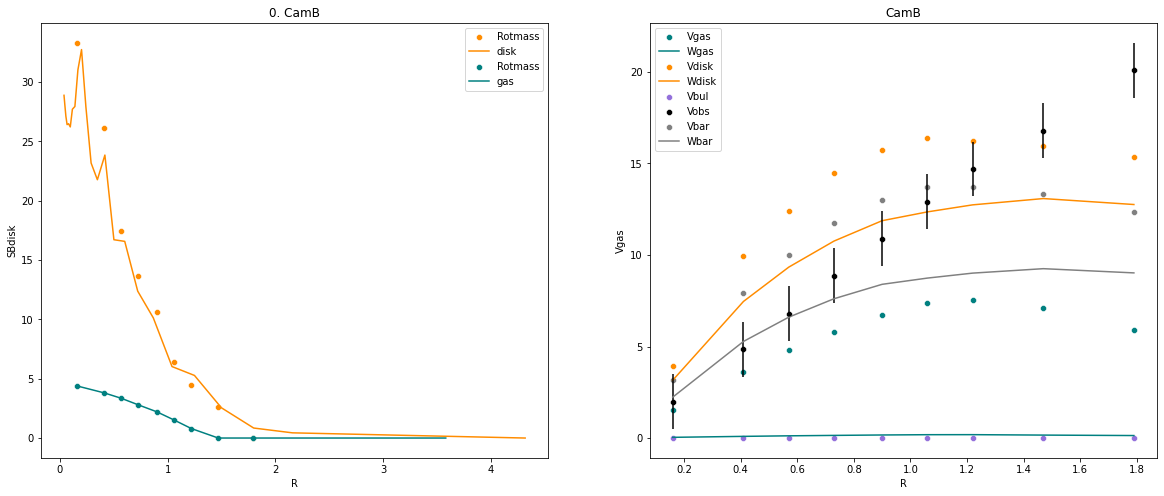

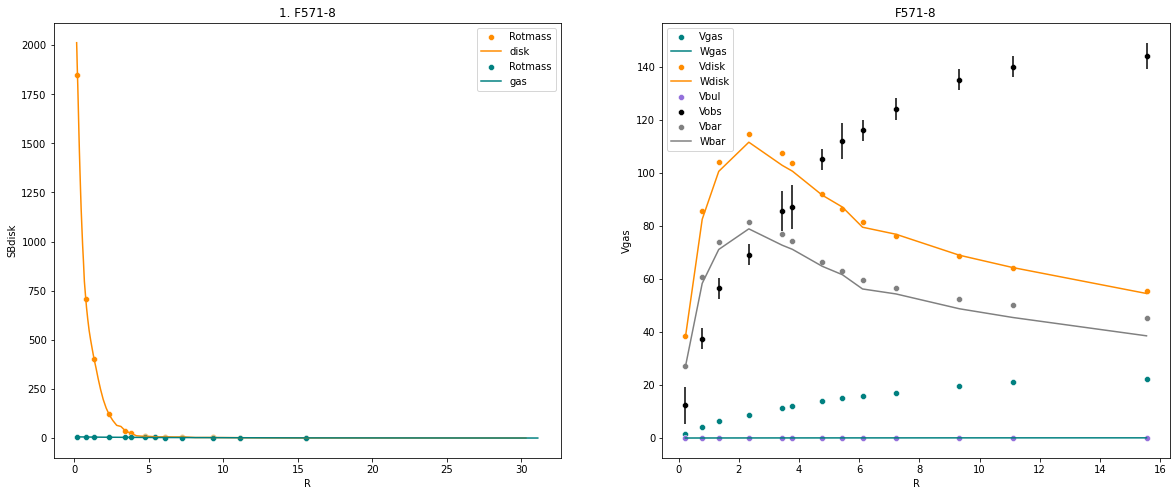

In [162]:
small = Result(simulations=gen_galaxies(200, zcut=2))
small.plot_velocities(profiles=True, sharex=False)

In [118]:
#legacy = Result(simulations=gen_galaxies(legacy=True))
small = Result(simulations=gen_galaxies())
#large = Result(simulations=gen_galaxies(300))
#long = Result(simulations=gen_galaxies(200, zcut=1))

completed in 9.24 seconds


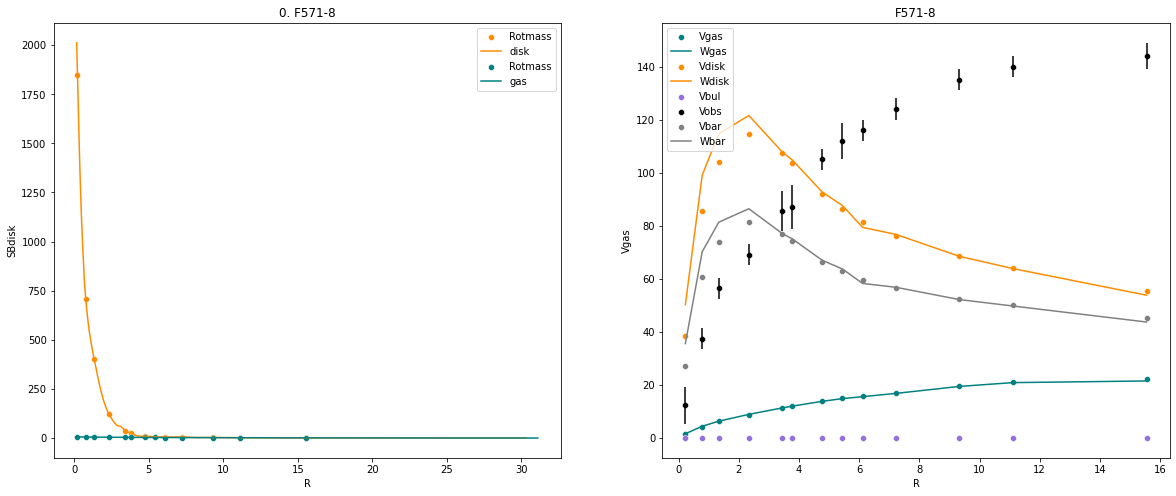

In [119]:
#legacy.plot_velocities(profiles=True, sharex=False)

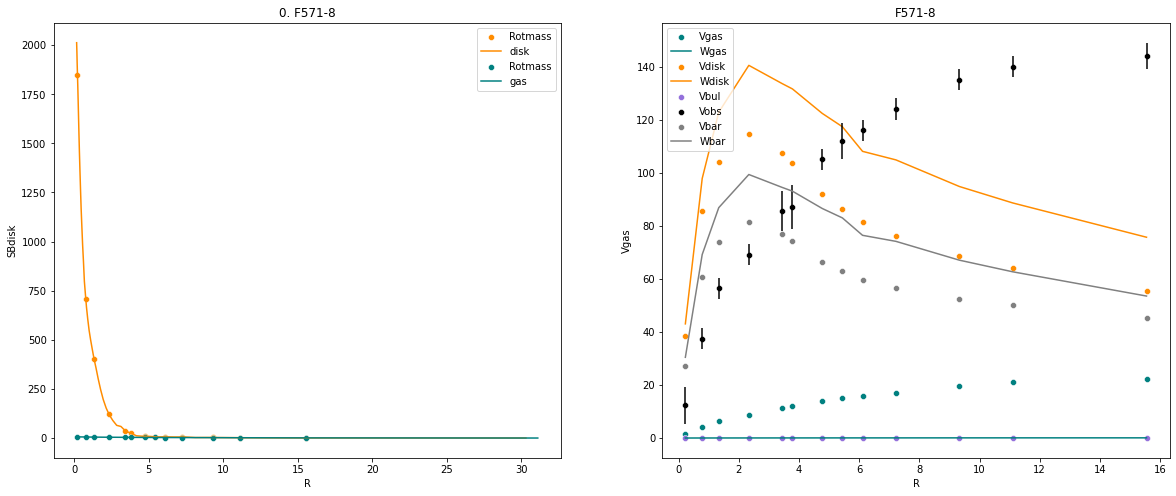

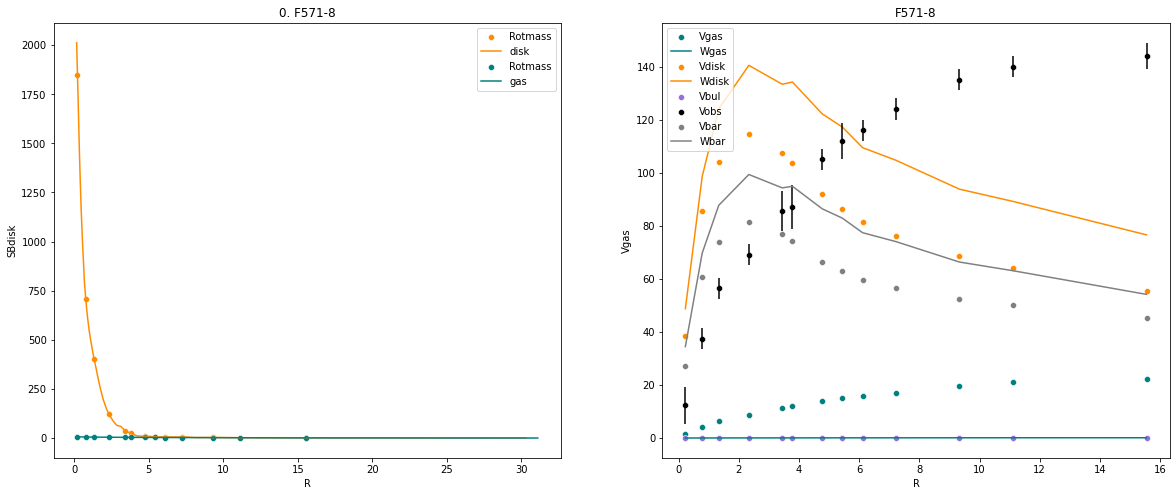

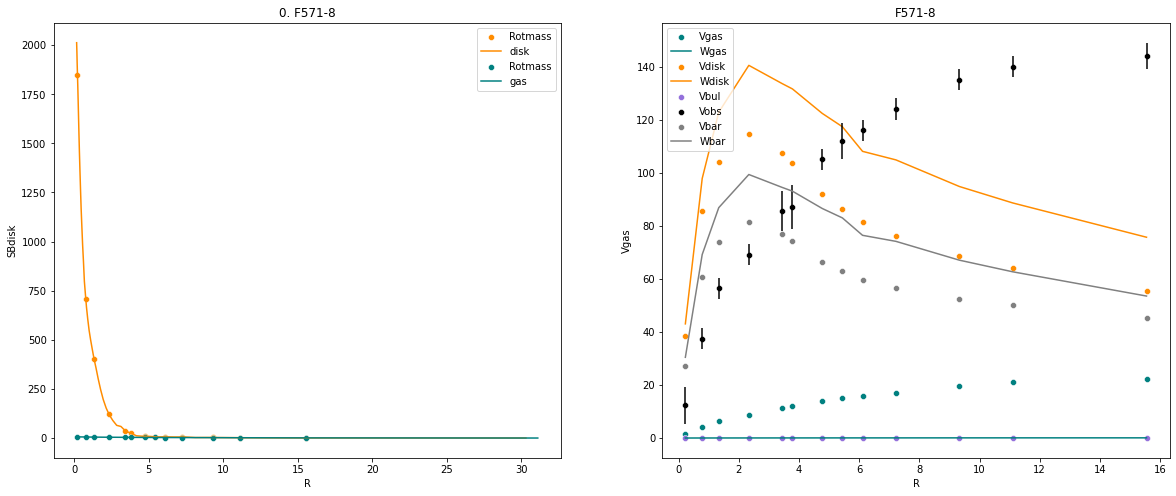

In [121]:
for result in (small, large, long):
    result.plot_velocities(profiles=True, sharex=False)

In [120]:
def correct(r):
    r.dataframe['Wdisk'] = r.dataframe['Wdisk']
    return r